# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [15]:
df = pd.read_csv('previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [16]:
df.dtypes

Unnamed: 0                 int64
data_ref                  object
index                      int64
sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
mau                         bool
renda                    float64
dtype: object

In [17]:
# Selecionar apenas as colunas 'posse_de_veiculo', 'posse_de_imovel' e 'renda'
df_analise = df[['posse_de_veiculo', 'posse_de_imovel', 'renda']]

df_analise.head()

,posse_de_veiculo,posse_de_imovel,renda
0,False,True,3369.24
1,True,True,6096.14
2,True,True,5658.98
3,True,False,7246.69
4,False,False,4017.37


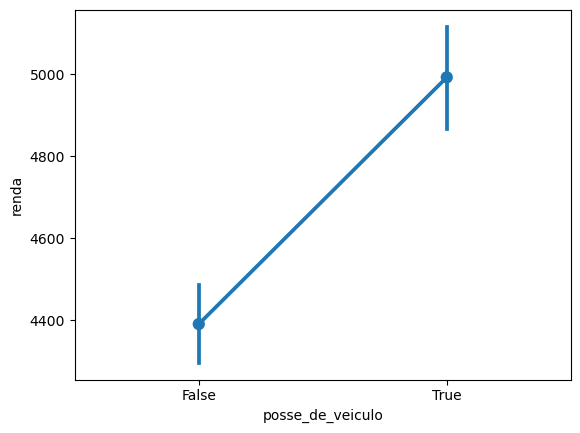

In [26]:
#Renda x Posse de veíuclo
ax = sns.pointplot(x="posse_de_veiculo", y="renda",
                   data=df_analise, dodge=True)

Para análise acima percebe-se que a posse de veículos está diretamente ligada a uma renda mais alta de quem não possui veículos

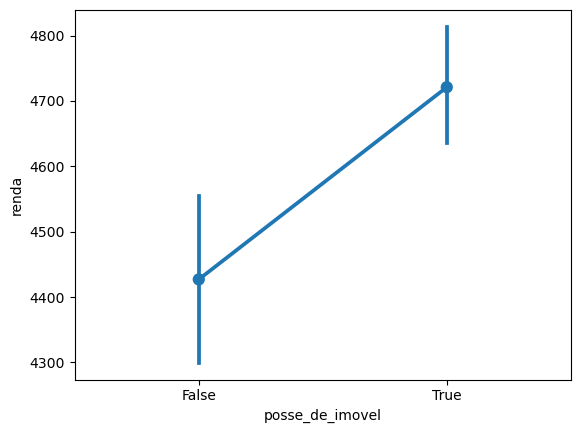

In [36]:
#Renda x Posse de imóvel
ax = sns.pointplot(x="posse_de_imovel", y="renda",
                   data=df_analise, dodge=True)

Para análise acima percebe-se que a posse de imóvel está diretamente ligada a uma renda mais alta de quem não possui veículos

Para uma análise mais aprofundada, foi verificado e comparado o fato da pessoa ter apenas um dos dois bens, ter os dois bens ou não ter nenhum
dos dois bens

In [35]:
# Criação das novas variáveis baseadas nas condições especificadas
df_analise['posse_apenas_imovel'] = (df_analise['posse_de_imovel'] == True) & (df_analise['posse_de_veiculo'] == False)
df_analise['posse_apenas_veiculo'] = (df_analise['posse_de_imovel'] == False) & (df_analise['posse_de_veiculo'] == True)
df_analise['sem_posse_nenhuma'] = (df_analise['posse_de_imovel'] == False) & (df_analise['posse_de_veiculo'] == False)
df_analise['posse_imovel_e_veiculo'] = (df_analise['posse_de_imovel'] == True) & (df_analise['posse_de_veiculo'] == True)

df_analise.head()

C:\Users\Matheus Cerqueira\AppData\Local\Temp\ipykernel_17916\3256635872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analise['posse_apenas_imovel'] = (df_analise['posse_de_imovel'] == True) & (df_analise['posse_de_veiculo'] == False)
C:\Users\Matheus Cerqueira\AppData\Local\Temp\ipykernel_17916\3256635872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analise['posse_apenas_veiculo'] = (df_analise['posse_de_imovel'] == False) & (df_analise['posse_de_veiculo'] == True)
C:\Users\Matheus Cerq

,posse_de_veiculo,posse_de_imovel,renda,posse_apenas_imovel,posse_apenas_veiculo,sem_posse_nenhuma,posse_imovel_e_veiculo
0,False,True,3369.24,True,False,False,False
1,True,True,6096.14,False,False,False,True
2,True,True,5658.98,False,False,False,True
3,True,False,7246.69,False,True,False,False
4,False,False,4017.37,False,False,True,False


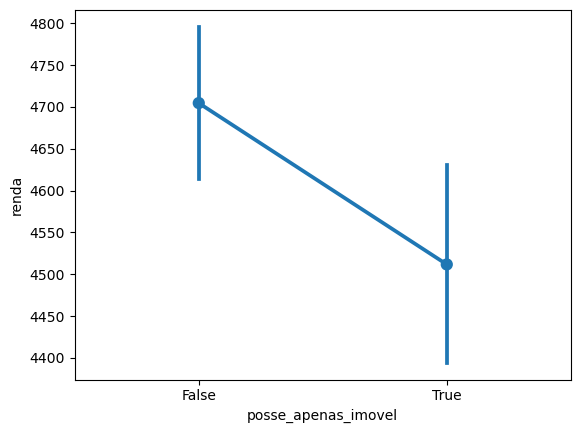

In [38]:
#Renda x Posse apenas imóvel
ax = sns.pointplot(x="posse_apenas_imovel", y="renda",
                   data=df_analise, dodge=True)

Foi notado no caso acima que pessoas que tem apenas imóvel tem uma renda menor

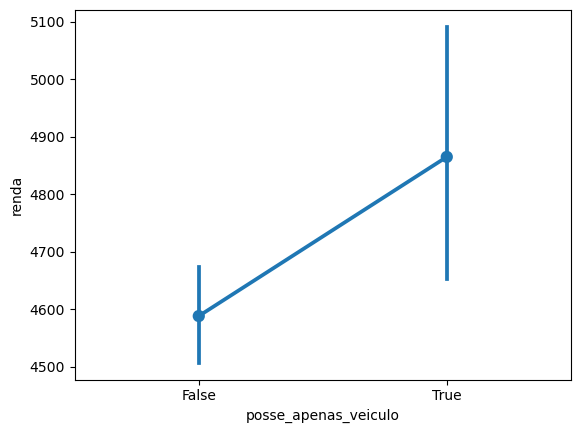

In [39]:
#Renda x Posse apenas veículo
ax = sns.pointplot(x="posse_apenas_veiculo", y="renda",
                   data=df_analise, dodge=True)

Foi notado no caso acima que pessoas que tem apenas veículos tem uma renda maior

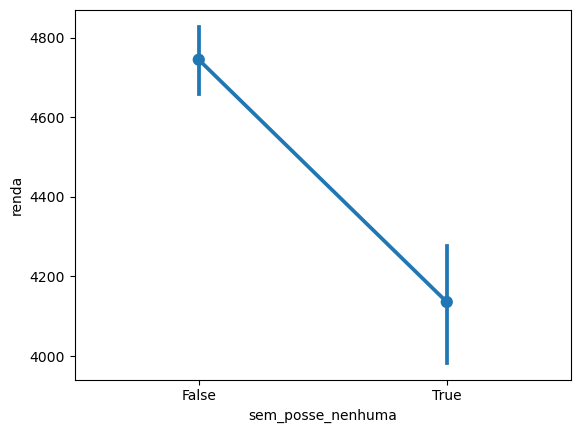

In [41]:
#Renda x sem posse de bens
ax = sns.pointplot(x="sem_posse_nenhuma", y="renda",
                   data=df_analise, dodge=True)

Foi notado no caso acima que pessoas que não tem bens tem uma renda menor

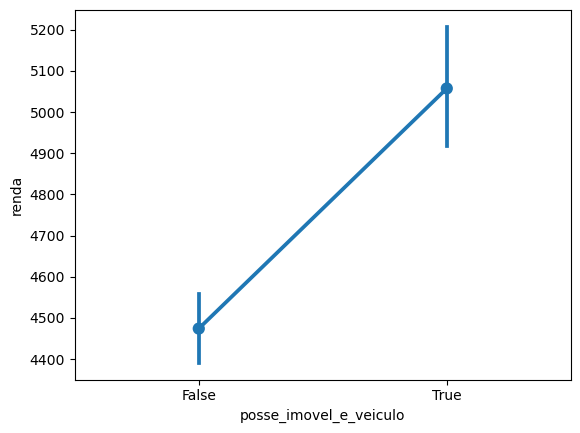

In [42]:
#Renda x Posse de veículo e imóvel
ax = sns.pointplot(x="posse_imovel_e_veiculo", y="renda",
                   data=df_analise, dodge=True)

Foi notado no caso acima que pessoas que têm os dois bens tem uma renda maior